In [1]:
# Working with data
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');


## 1. Descrieti un plan pentru constructia unui predictor pentru coloana label. 

## Data Processing 

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
          'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']
df = pd.read_csv('data_train.csv', names = columns)

In [3]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['label'] = labelEncoder.fit_transform(df['label'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29305 entries, nan to 8900.0
Data columns (total 15 columns):
age               29305 non-null object
workclass         29305 non-null object
fnlwgt            29305 non-null object
education         29305 non-null object
education-num     29305 non-null object
marital-status    29305 non-null object
occupation        29305 non-null object
relationship      29305 non-null object
race              29305 non-null object
sex               29305 non-null object
capital-gain      29305 non-null object
capital-loss      29305 non-null object
hours-per-week    29305 non-null object
native-country    29305 non-null object
label             29305 non-null int32
dtypes: int32(1), object(14)
memory usage: 3.5+ MB


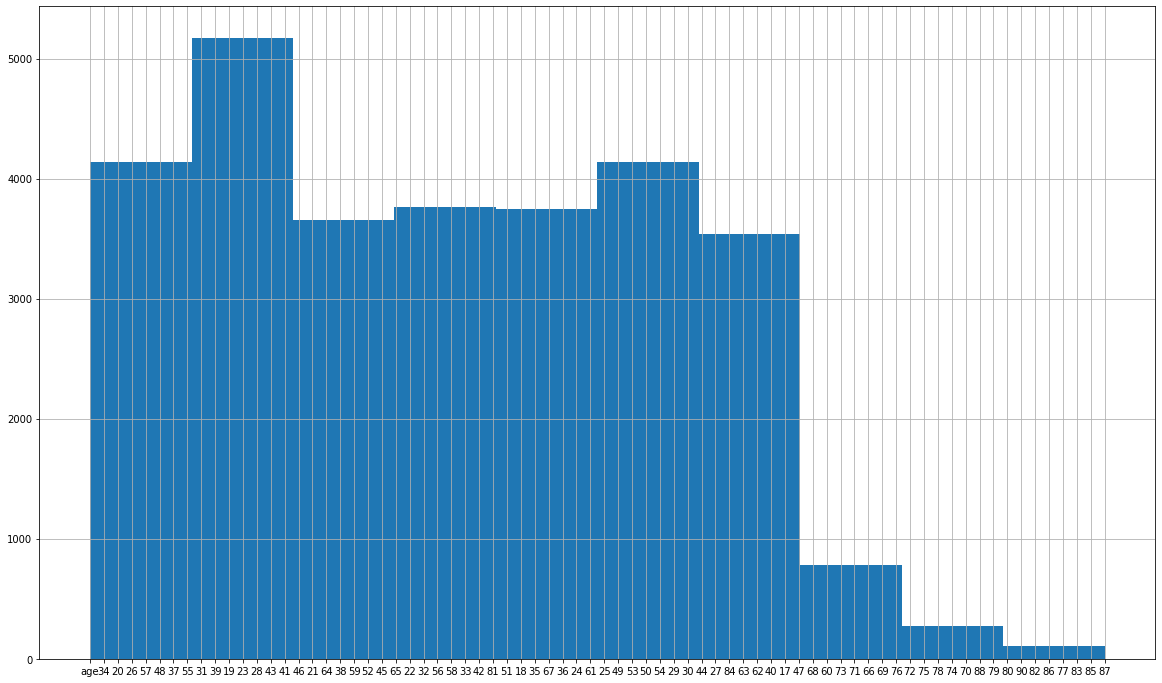

In [5]:
rcParams['figure.figsize'] = 20, 12
#x=df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
df['age'].hist()
plt.show()

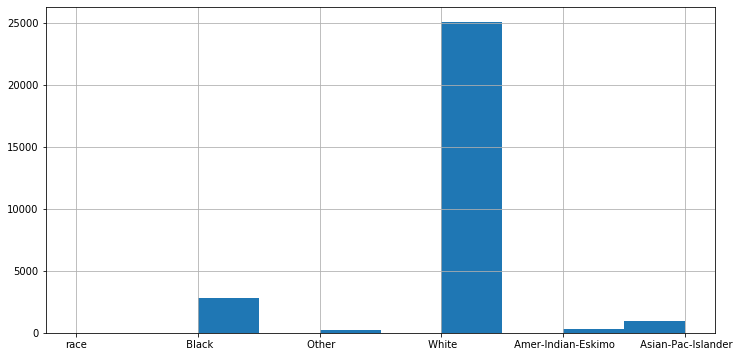

In [6]:
rcParams['figure.figsize'] = 12, 6
df['race'].hist()
plt.show()

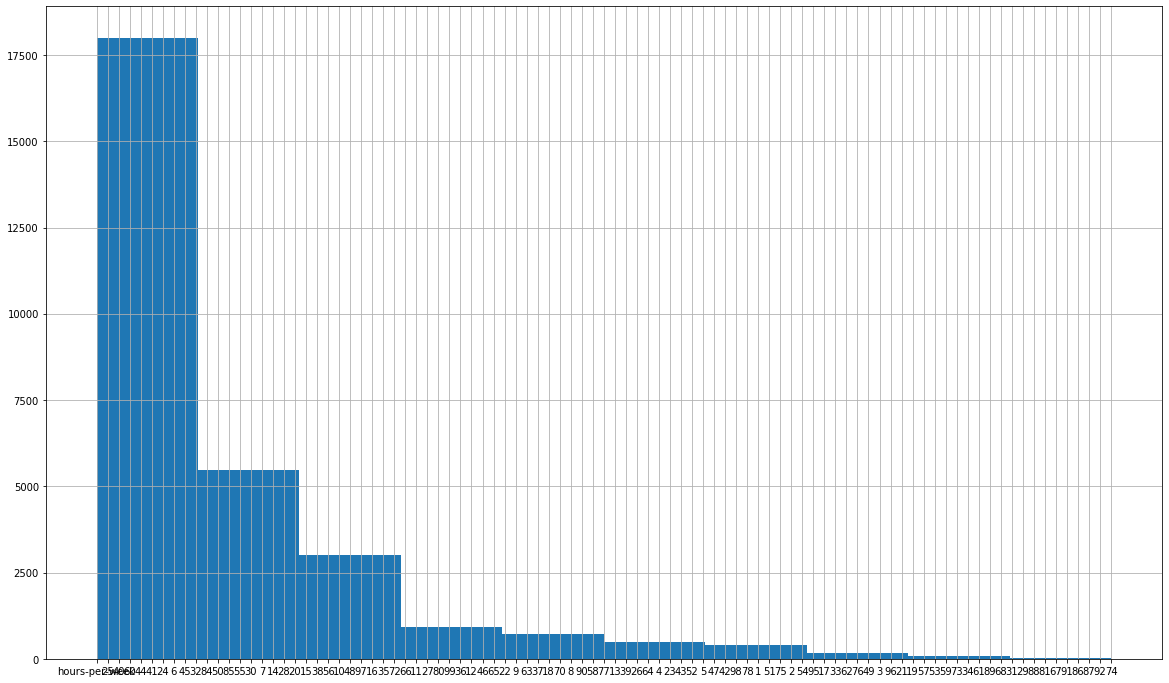

In [7]:
rcParams['figure.figsize'] = 20, 12
df['hours-per-week'].hist()
plt.show()

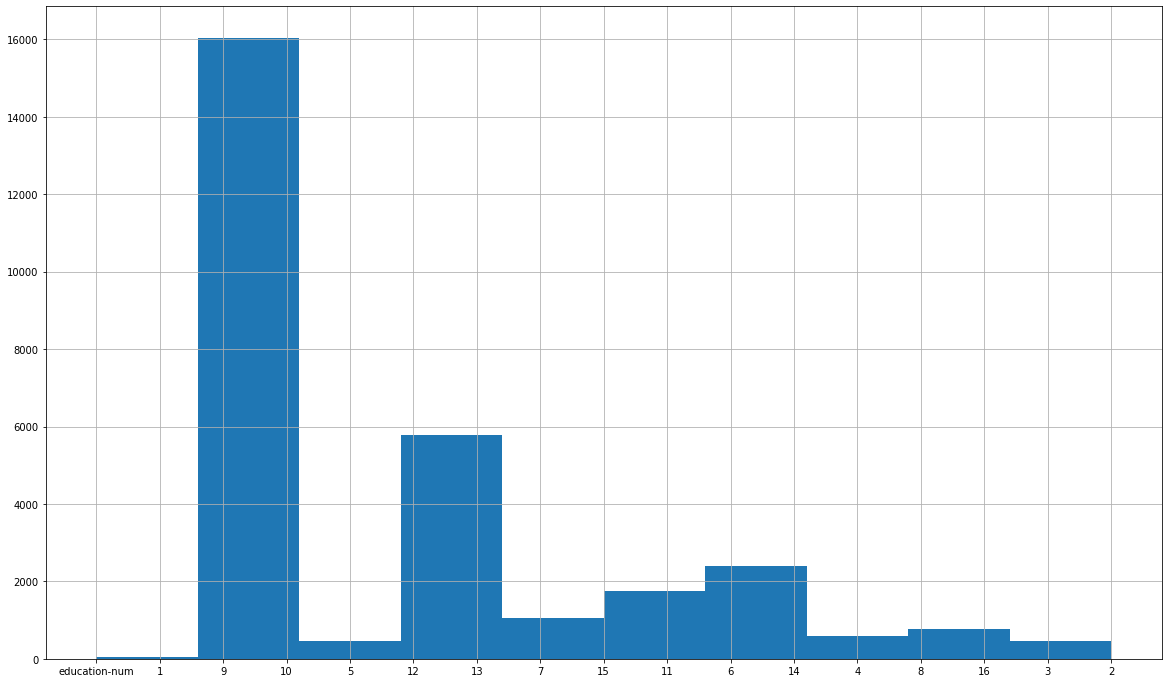

In [8]:
rcParams['figure.figsize'] = 20, 12
df['education-num'].hist()
plt.show()

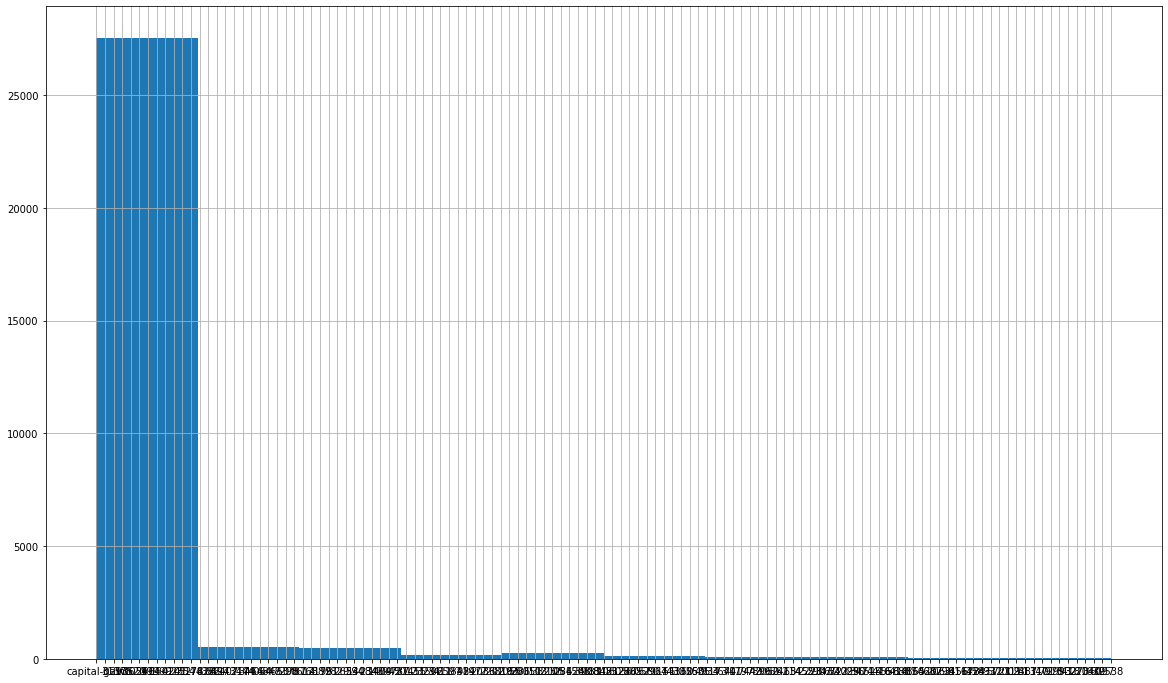

In [9]:
rcParams['figure.figsize'] = 20, 12
df['capital-gain'].hist()
plt.show()

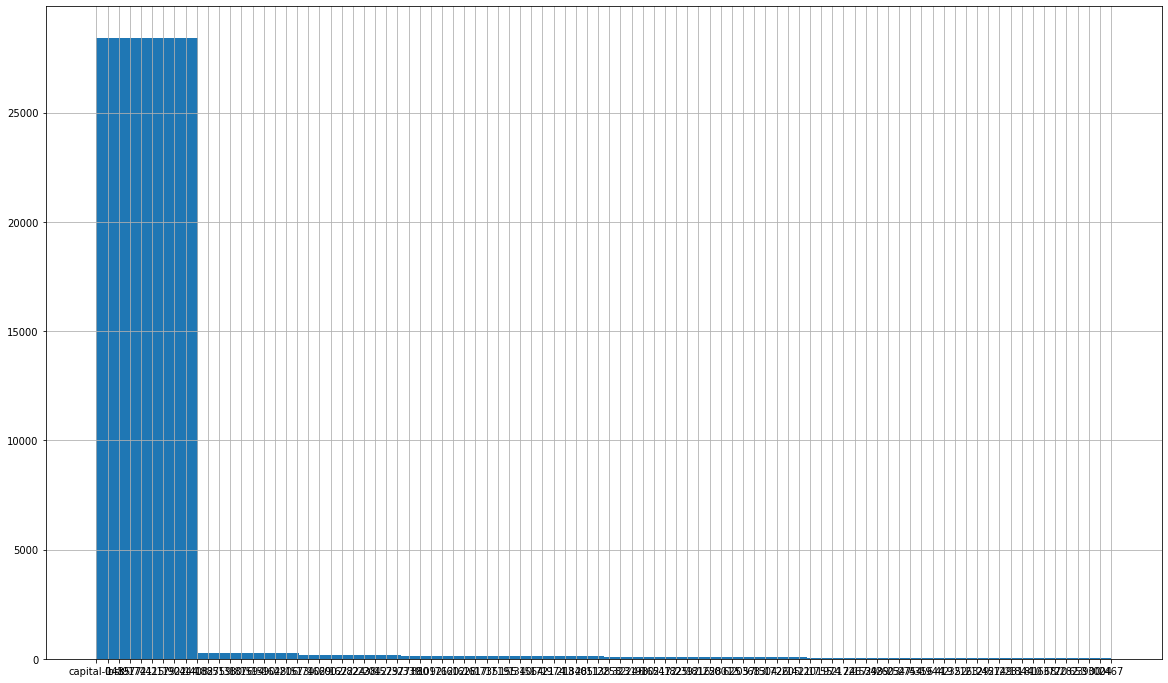

In [10]:
rcParams['figure.figsize'] = 20, 12
df['capital-loss'].hist()
plt.show()

From the histograms above, I can draw the following conclusion:

group the Age column into bins.
We need to analyse education-num further as it might align with education
Final Weight is also left skewed.
The Hours per Week can also be split into bins.


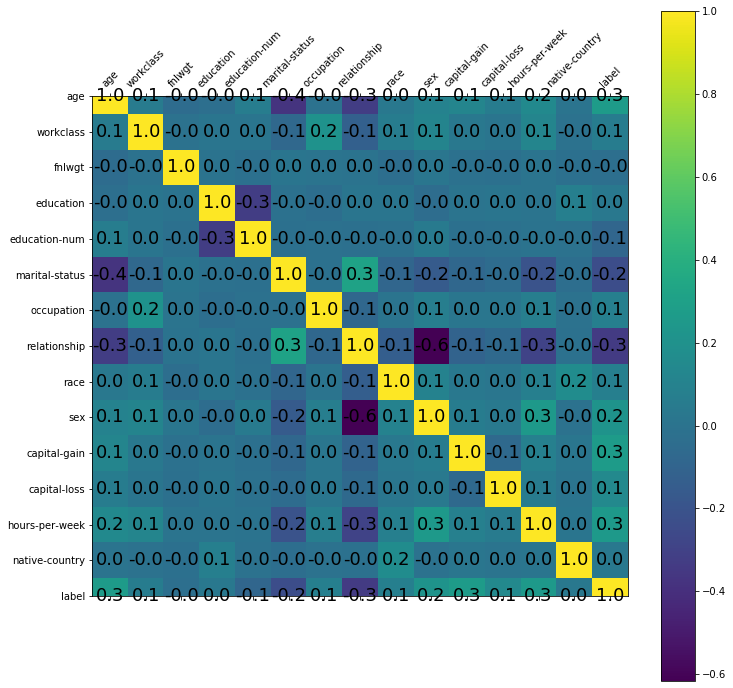

In [13]:
plt.matshow(df.rank().corr())
plt.colorbar()
plt.xticks(np.arange(len(df.rank().corr().columns)), df.rank().corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.rank().corr().columns)), df.rank().corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.rank().corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='black', fontsize=18)

## Age 

Split the age in 3 categories
1. 0-25: Young
2. 25-50: Adult
3. 50-100:Old

In [14]:
df['age'] = pd.cut(pd.to_numeric(df['age'],errors='coerce'), 
                        bins = [0, 25, 50, 100], 
                        labels = ['Young', 'Adult', 'Old'])

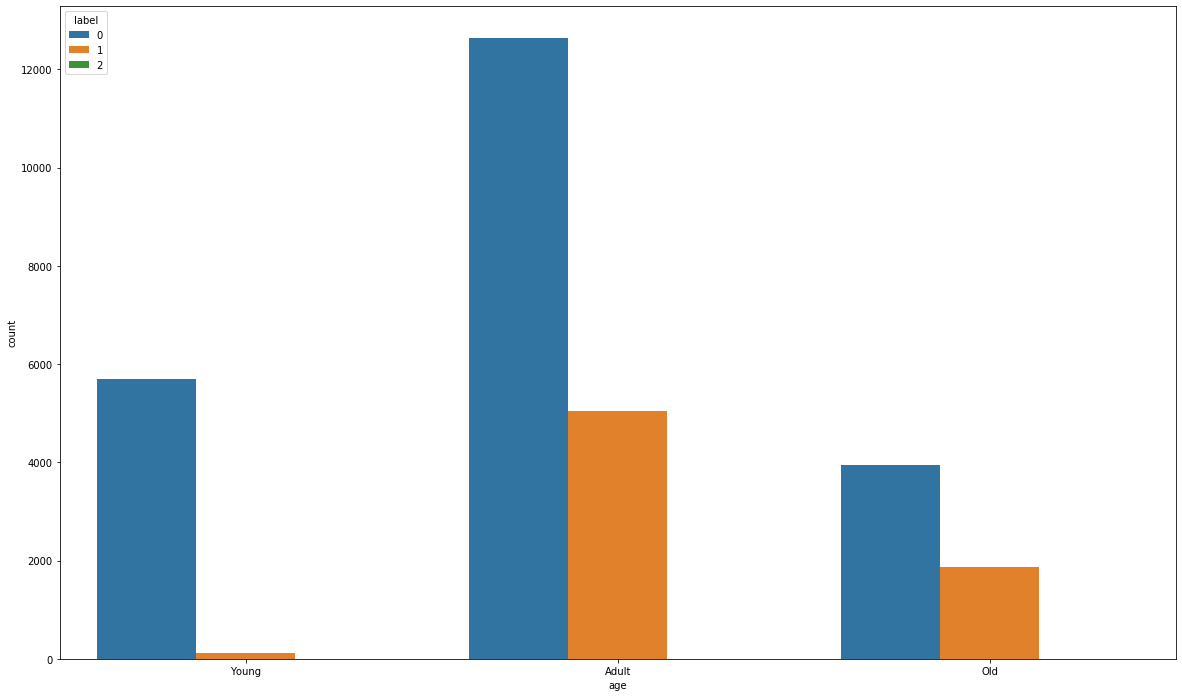

In [15]:
sns.countplot(x = 'age', hue = 'label', data = df)

## Final Weight 

In [16]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

## Hours per Week 

Split the hours-per-week in 3 categories. As usually, the work hours are close to 30-40 hours
1. 0-30: hours
2. 30-40: hours
3. 40-100:hours

In [17]:
df['hours-per-week'] = pd.cut(pd.to_numeric(df['hours-per-week'],errors='coerce'), 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

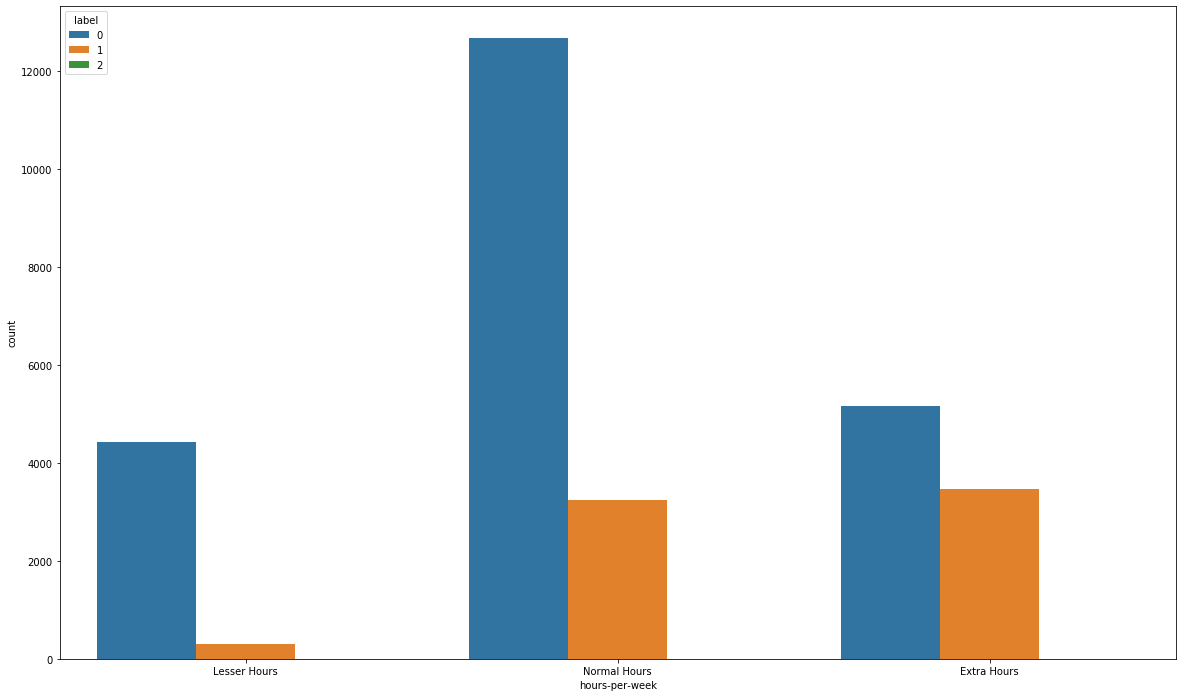

In [18]:
sns.countplot(x = 'hours-per-week', hue = 'label', data = df)

As the number of hours increase, the number of people earning more than $50K increases in comparison to the people earning less.

In [19]:
#Capital Difference

In [20]:

#dataset.assign(diff=lambda x: pd.to_numeric(x['capital-gain'],errors='coerce') - pd.to_numeric(x['capital-loss'],errors='coerce')



In [21]:
#dataset['capital-diff'] = pd.cut(pd.to_numeric(dataset['capital-diff'],errors='coerce'), bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
#sns.countplot(x = 'capital-diff', hue = 'label', data = dataset)

## Work Class 

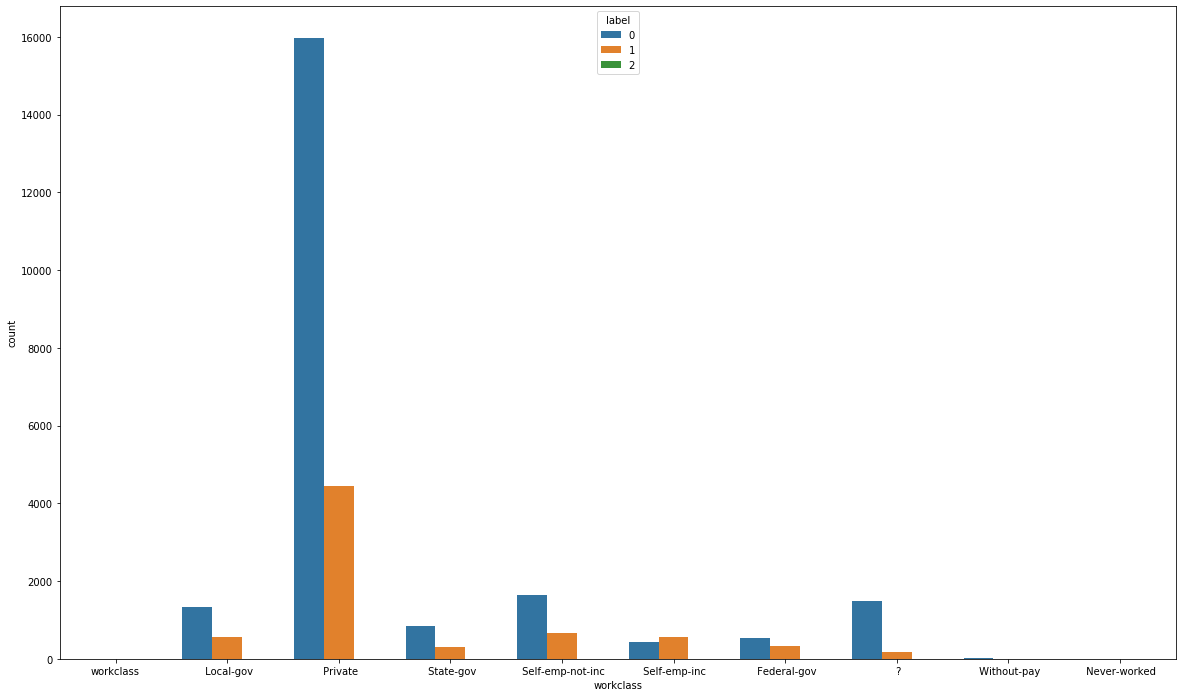

In [22]:
sns.countplot(x = 'workclass', hue = 'label', data = df)

Taking a look at the plot above, I spotted a value defined as ? which seems to be the error data.
As it is very less, I'll simply remove these records. Also, the two values Without-pay and Never-worked are negligible and is safe to drop them too.

In [23]:
df = df.drop(df[df['workclass'] == ' ?'].index)
df = df.drop(df[df['workclass'] == ' Without-pay'].index)
df = df.drop(df[df['workclass'] == ' Never-worked'].index)

## Education and education-num 

There is any relation between education and education-num? Let's check it out!

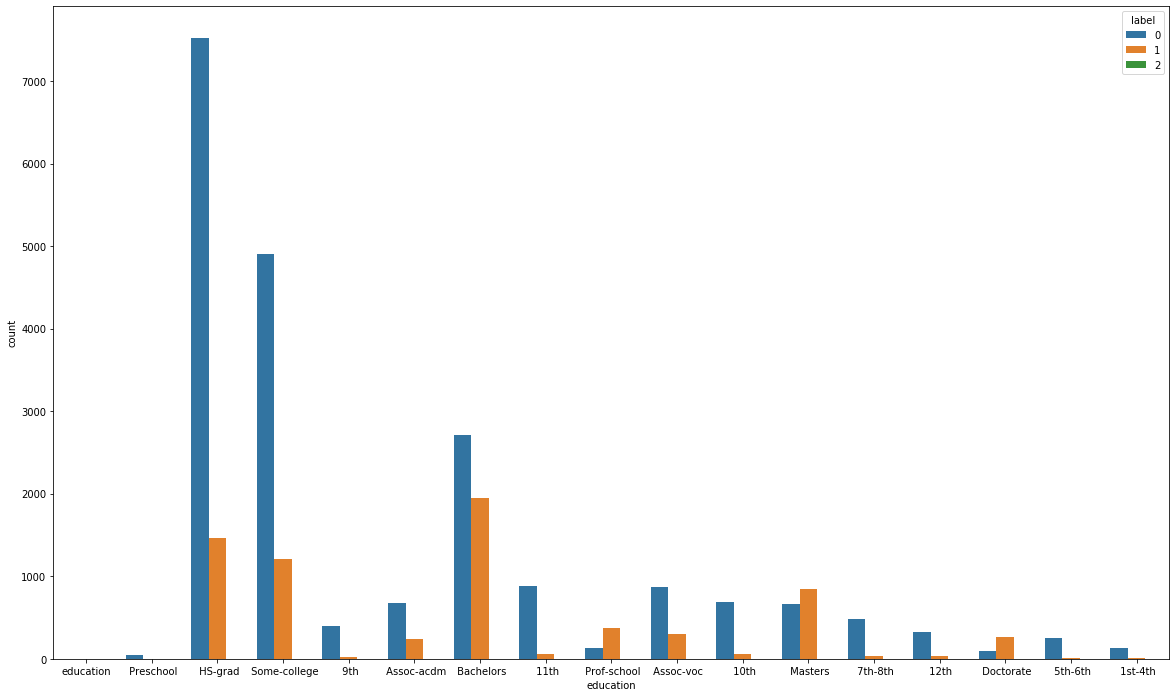

In [24]:
sns.countplot(x = 'education', hue = 'label', data = df)

In [25]:
ed_classes = df['education'].unique()
for item in ed_classes:
    print("For {}, the education-num is {}"
          .format(item, df[df['education'] == item]['education-num'].unique()))

For education, the education-num is ['education-num']
For  Preschool, the education-num is ['1']
For  HS-grad, the education-num is ['9']
For  Some-college, the education-num is ['10']
For  9th, the education-num is ['5']
For  Assoc-acdm, the education-num is ['12']
For  Bachelors, the education-num is ['13']
For  11th, the education-num is ['7']
For  Prof-school, the education-num is ['15']
For  Assoc-voc, the education-num is ['11']
For  10th, the education-num is ['6']
For  Masters, the education-num is ['14']
For  7th-8th, the education-num is ['4']
For  12th, the education-num is ['8']
For  Doctorate, the education-num is ['16']
For  5th-6th, the education-num is ['3']
For  1st-4th, the education-num is ['2']


From the analysis above, I discovered that Education Number and Education are just the same. In this case, I can drop any one column. 
Also, I'll combine all information from Preschool to 12th as they can be considered of one class who have no college/university level education.

In [26]:
df.drop(['education-num'], axis = 1, inplace = True)
df['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
df['education'].value_counts()

 HS-grad         8987
 Some-college    6113
 Bachelors       4657
 School          3422
 Masters         1511
 Assoc-voc       1174
 Assoc-acdm       917
 Prof-school      501
 Doctorate        354
education           1
Name: education, dtype: int64

## Marital Status and Relationship 

In [27]:
df['marital-status'].value_counts()

 Married-civ-spouse       12860
 Never-married             8969
 Divorced                  3835
 Separated                  859
 Widowed                    750
 Married-spouse-absent      343
 Married-AF-spouse           20
marital-status                1
Name: marital-status, dtype: int64

In [28]:
df['relationship'].value_counts()

 Husband           11416
 Not-in-family      7058
 Own-child          4090
 Unmarried          2961
 Wife               1271
 Other-relative      840
relationship           1
Name: relationship, dtype: int64

Both of them have no missing values. That's great!

## Occupation 

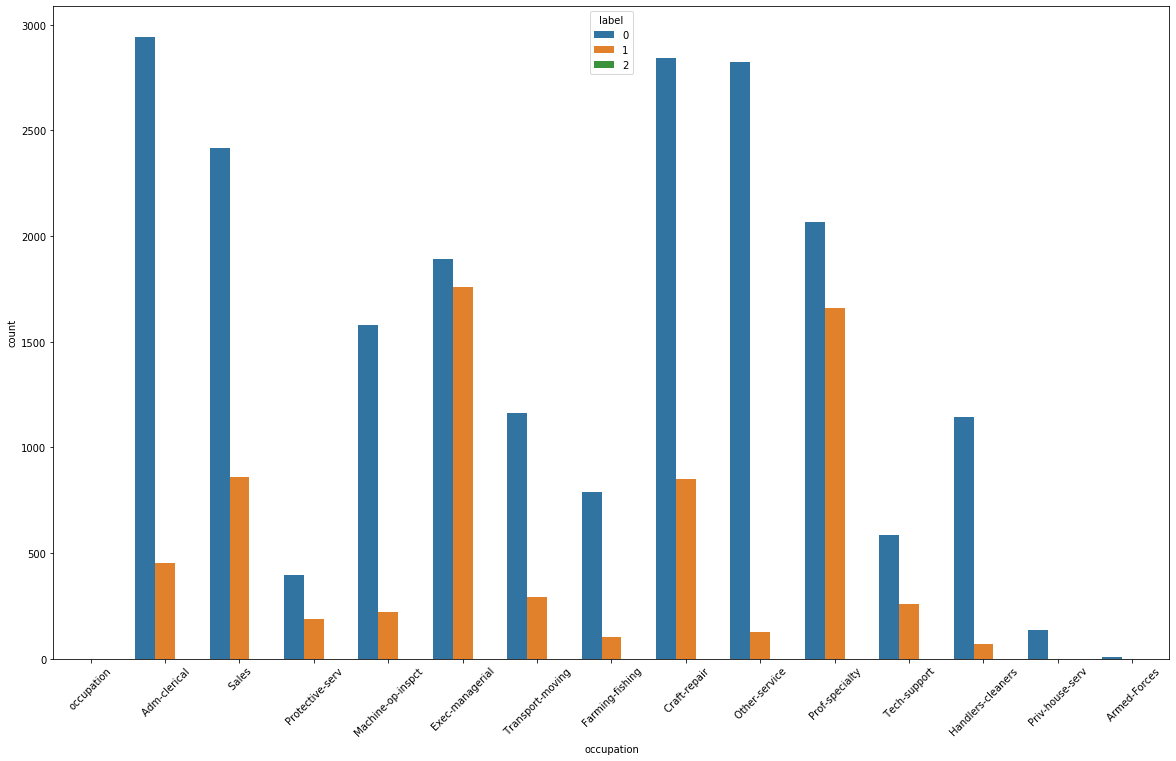

In [29]:
plt.xticks(rotation = 45)
sns.countplot(x = 'occupation', hue = 'label', data = df)

The data has no missing values.

## Race 

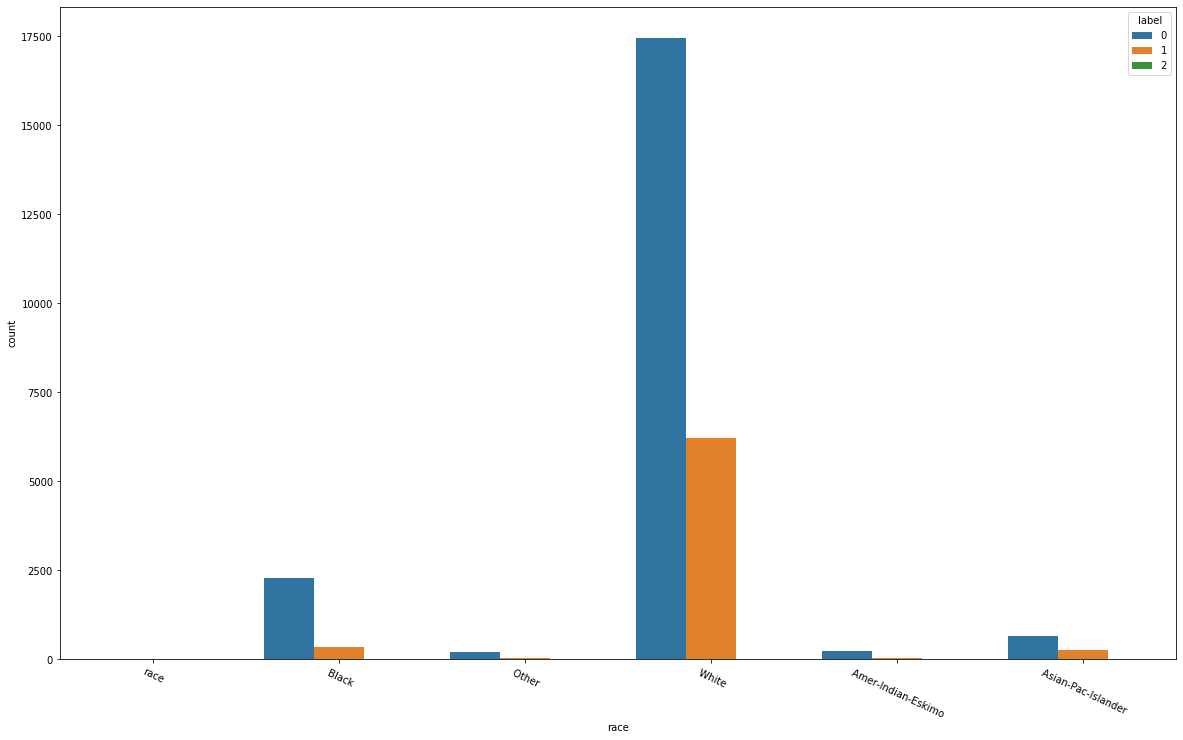

In [30]:
plt.xticks(rotation = -25)
sns.countplot(x = 'race', hue = 'label', data = df)

The data set provides information about White race. As you can see, the other races are lesser in number, so it will be more efficient to put these in a single categorie 'Other'

In [31]:
df['race'].unique()
df['race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

## Sex 

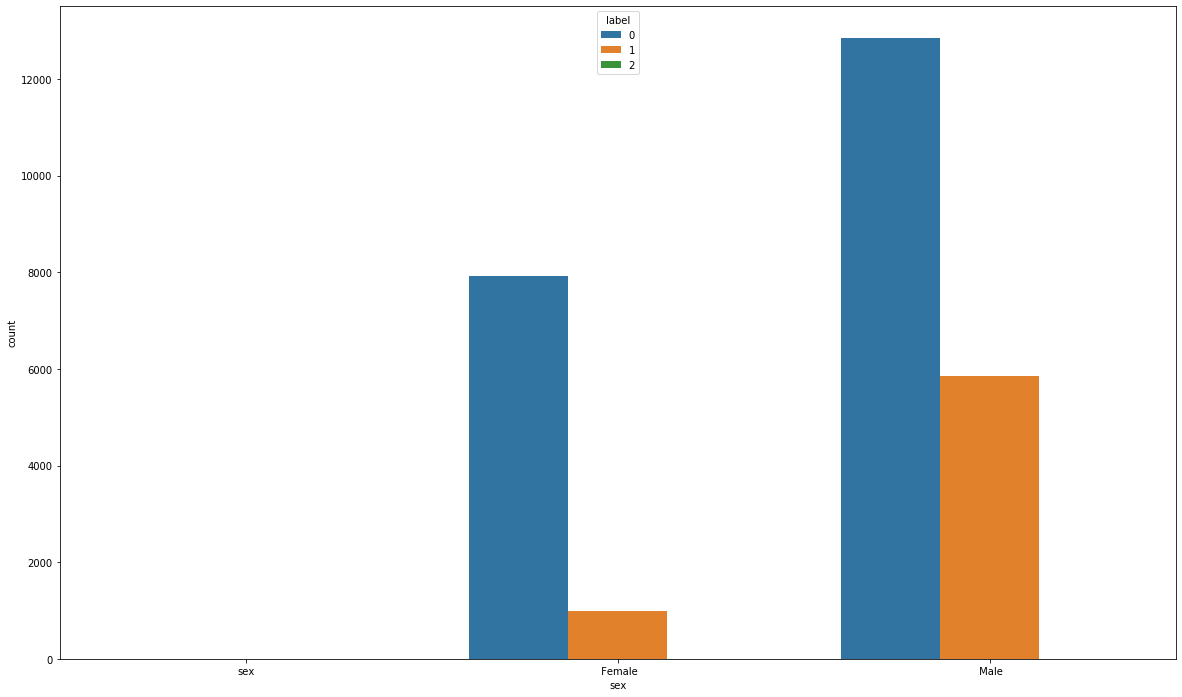

In [32]:
sns.countplot(x='sex', hue='label',data=df)

From the previous plot we have the following:

1.There are more Male participants than Female participants

2.More percentage of Males have an Income of more than \$50K than Females.

## Country 

In [33]:

country_count = df['native-country'].value_counts()
country_count

 United-States                 24755
 Mexico                          543
 ?                               503
 Philippines                     167
 Germany                         120
 Puerto-Rico                      98
 Canada                           98
 El-Salvador                      89
 India                            88
 Cuba                             81
 England                          78
 South                            68
 Jamaica                          68
 Italy                            64
 China                            61
 Dominican-Republic               59
 Guatemala                        59
 Vietnam                          55
 Japan                            53
 Poland                           50
 Columbia                         50
 Haiti                            40
 Taiwan                           39
 Iran                             37
 Nicaragua                        31
 Portugal                         30
 Greece                           27
 

Text(0.5, 1.0, 'Total adults from each Country')

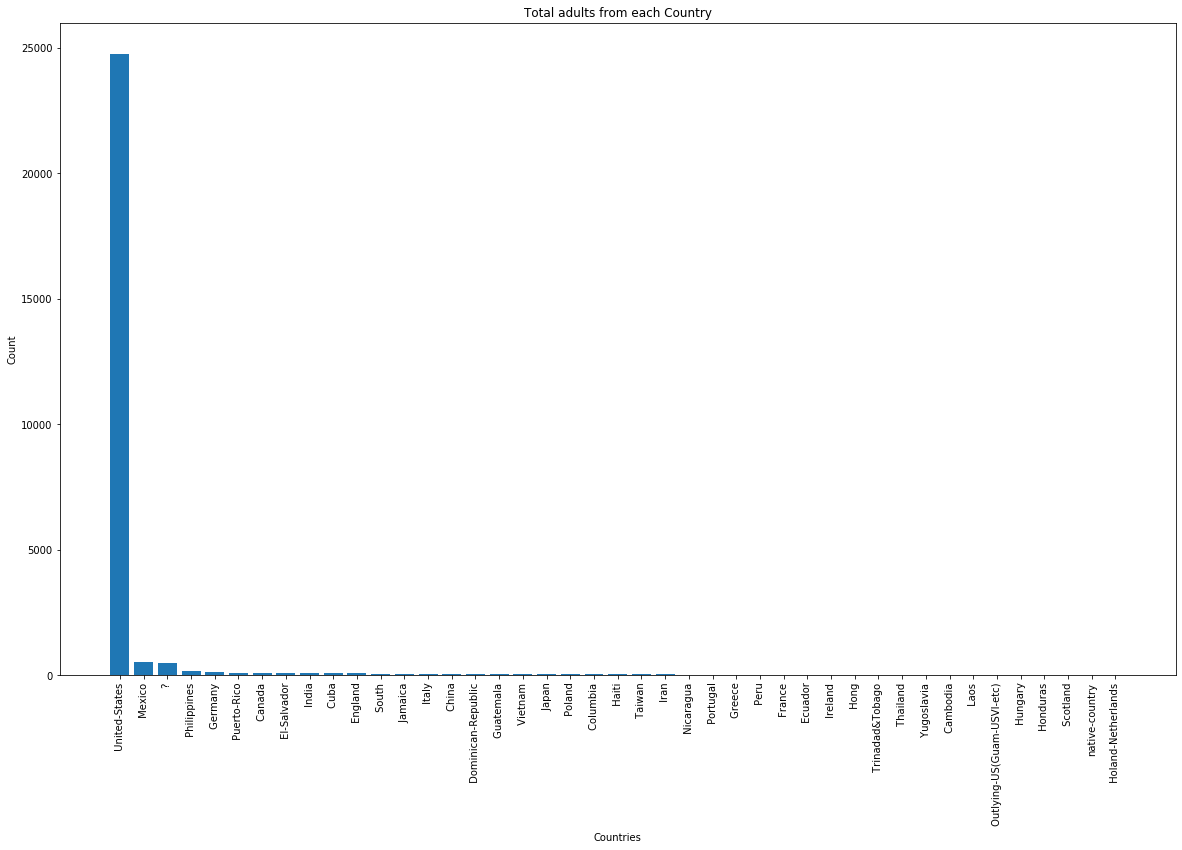

In [34]:
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

From the previous plot we can noticed:
    1.There are some missing values in native-country column denoted by ?. As they are very less, I'll drop these rows.
    
    2.The majority of adults are from United States. Thus, we can make 2 columns as either United States or Other.

In [35]:
df = df.drop(df[df['native-country'] == ' ?'].index)

countries = np.array(df['native-country'].unique())
countries = np.delete(countries, 0)

df['native-country'].replace(countries, 'Other', inplace = True)

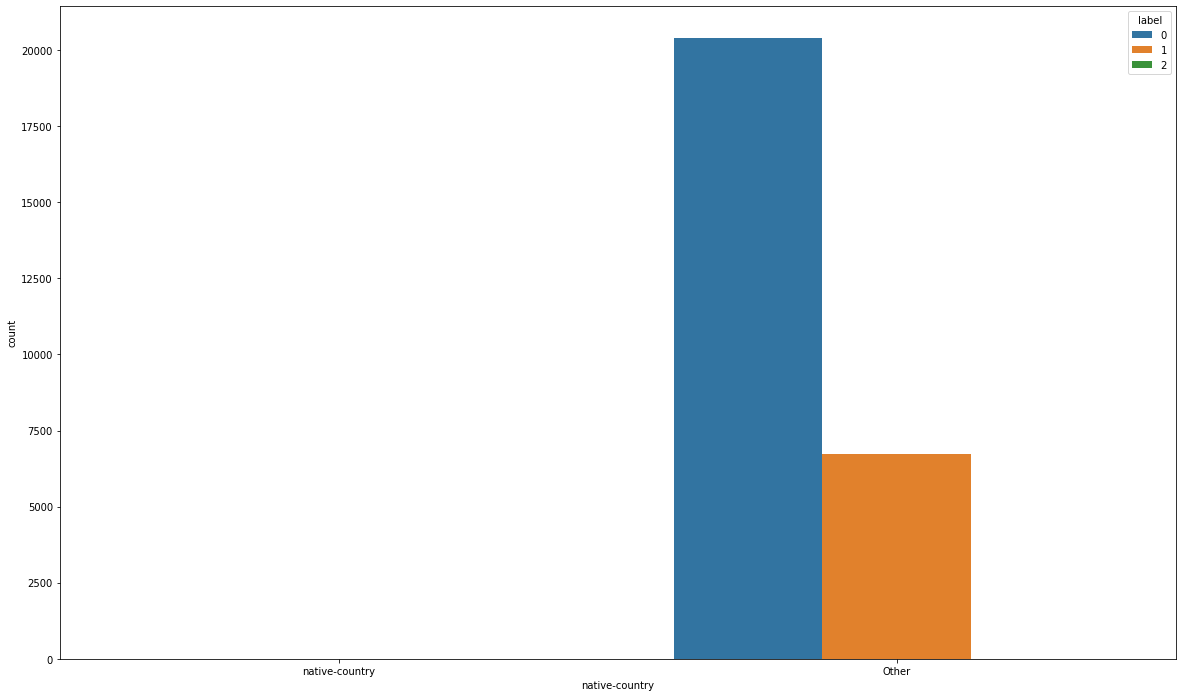

In [36]:
sns.countplot(x = 'native-country', hue = 'label', data = df)

## Data Manipulation 

I will use the get_dummies method of pandas to get separate columns for each feature based on the unqiue values in the dataset.

In [37]:
y = df['label']
X = df.drop(['label'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 269


Next, I will split the dataset into the training and testing data using train_test_split.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## Machine Learning 

In [39]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [40]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []

In [41]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.42
Support Vector Classifier:
F1 score: 0.65
Decision Tree Classifier:
F1 score: 0.65
Random Forest Classifier:
F1 score: 0.66
Gradient Boosting Classifier:
F1 score: 0.67


## Analysing Results 

I use Accuracy Plot and ROC Curve to analyse the results

## Accuracy Plot 

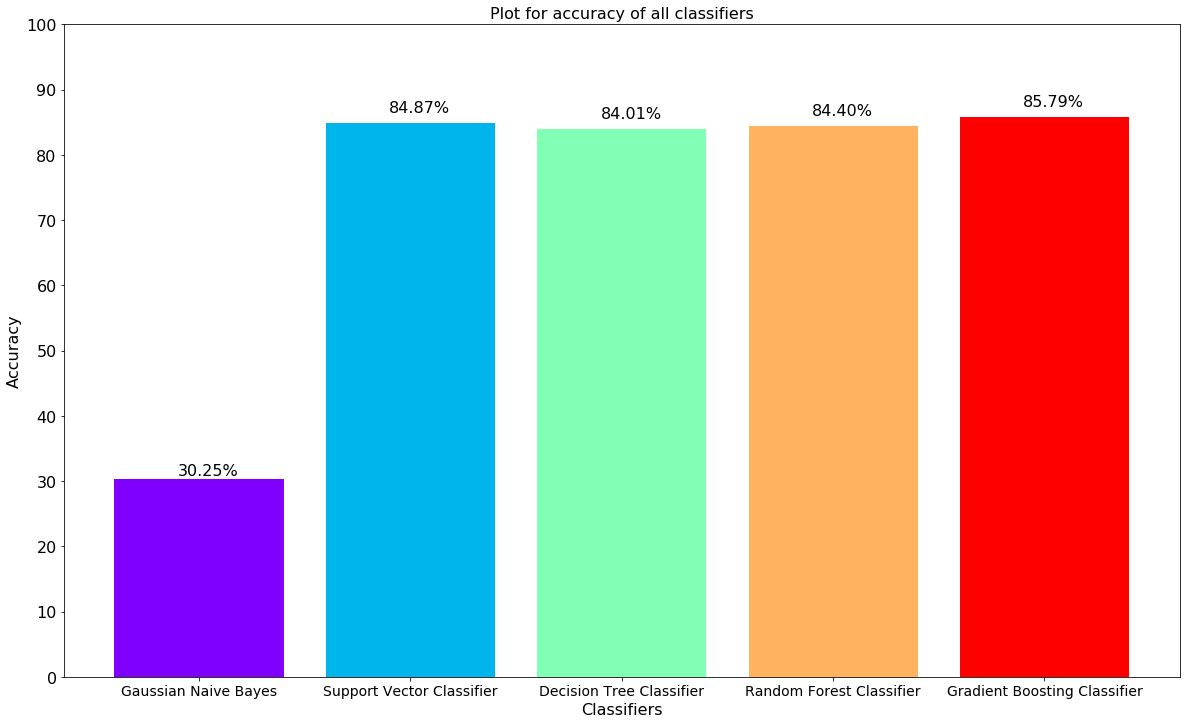

In [45]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

We should notice this result:

1.The Gaussian Naive Bayes: 30.25%

2.The Support Vector Classifier: 84.87%

3.The Decision Tree Classifier Classifiers:84.01%

4.The Random Forest Classifier:84.40%

5.The Gradient Boosting Classifier:85.79%

## ROC(Receiver Operating Characteristic) Curve 

Let's also analyse the ROC Curve for the predictions for income more than $50K.

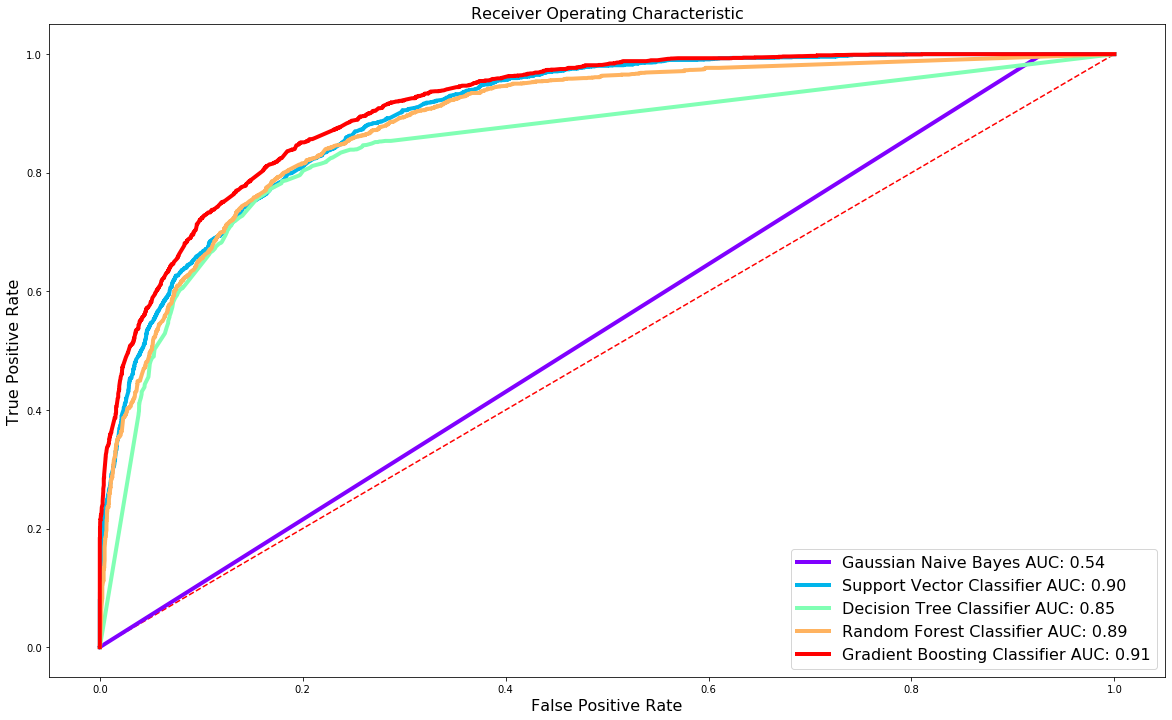

In [47]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

Gradient Boosting Classifier has the maximum Area Under Curve with a value of 0.91.

## Create a function with a data frame as parameter 

In [ ]:
def predict(dataframe,column_target):
    y = df[column_target]
X = df.drop([column_target], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []

for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)
    
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)



## 2. Pentru acelasi set de date, construiti un plan pentru a oferi o recomandare bazata pe date de crestere a venitului la peste 50k$/year. 

We need to check which feature influence the label, and for that we need filtering the data.

## 1. Filter Method: 

The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


X = df.drop('label',1)   #Feature Matrix
y = df['label']          #Target Variable
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
NaN,NaN,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,NaN,native-country,2
27239.0,Adult,Local-gov,School,Never-married,Adm-clerical,Own-child,Other,Female,0,0,Lesser Hours,Other,0
19102.0,Young,Private,HS-grad,Never-married,Sales,Own-child,Other,Male,0,0,Normal Hours,Other,0
16791.0,Adult,State-gov,HS-grad,Never-married,Protective-serv,Not-in-family,White,Male,0,0,Normal Hours,Other,0
2832.0,Old,Self-emp-not-inc,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,Extra Hours,Other,1


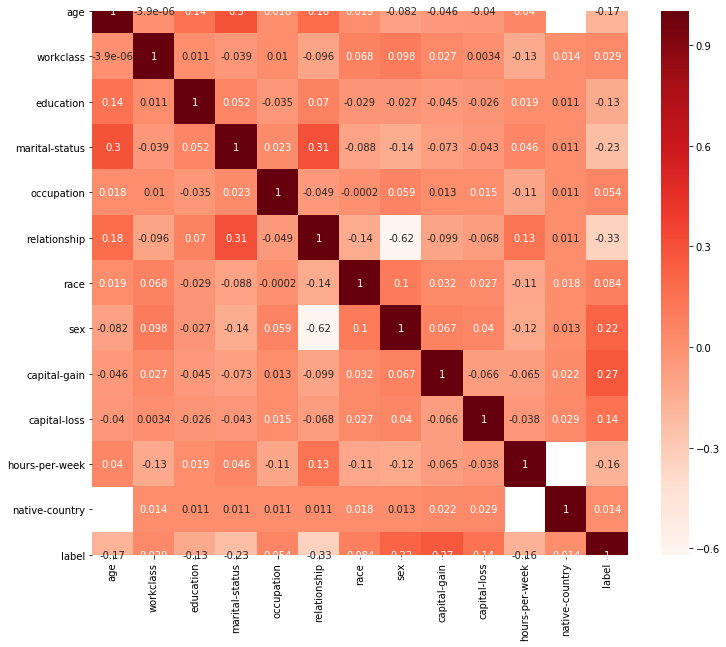

In [49]:
plt.figure(figsize=(12,10))
cor = df.rank().corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [50]:
#Correlation with output variable
cor_target = abs(cor['label'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


label    1.0
Name: label, dtype: float64

As we can see, no feature influence the label. Is this correct?

We need make the test again and find out more information! Using threshold 0.2

In [51]:

cor_target1 = abs(cor['label'])


relevant_features1 = cor_target[cor_target1>0.2]
relevant_features1

marital-status    0.228096
relationship      0.334970
sex               0.218244
capital-gain      0.268913
label             1.000000
Name: label, dtype: float64

So, this time something happend, but not exactly how we supposed to be. 

It seems that only Relationship has at least over 0.33, an the others <0.3.

Let's find more information, but not forget to notive that relationship is the feature with most influence over the label.

## Here we are testing the correlation for relationship and the closest to his value:capital-gain,marital-status

In [52]:
print(df[['relationship','sex']].rank().corr())
print(df[['capital-gain','relationship']].rank().corr())

              relationship       sex
relationship      1.000000 -0.618863
sex              -0.618863  1.000000
              capital-gain  relationship
capital-gain      1.000000     -0.099058
relationship     -0.099058      1.000000


Let's note what happened:

Relationship and sex features implies stronger negative correlation,

while relationship and capital-gain is not on that direction

The final features given by Pearson correlation are: relationship and sex. So we will keep these and drop the others

In [53]:
df.drop(['capital-gain'], axis = 1, inplace = True)
df.drop(['marital-status'],axis=1,inplace=True)

## 2. Wrapper Method: 

## i. Backward Elimination 

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

We will first run one iteration here just to get an idea of the concept and then we will run the same code in a loop, which will give the final set of features. Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

## Step 1 : Basic preprocessing and encoding 

In [54]:
import statsmodels.api as sm # importing OLS model
from sklearn.model_selection import train_test_split 
X = df.drop('label',1)   #Feature Matrix
y = df['label']          #Target Variable
df.head()

X = pd.get_dummies(X) # Encoding data
X.head() 


,age_Young,age_Adult,age_Old,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_workclass,...,capital-loss_653,capital-loss_810,capital-loss_880,capital-loss_974,capital-loss_capital-loss,hours-per-week_Lesser Hours,hours-per-week_Normal Hours,hours-per-week_Extra Hours,native-country_Other,native-country_native-country
NaN,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
27239.0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
19102.0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
16791.0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2832.0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


## Step 2 : Splitting the data into training and testing set and making predictions 

In [59]:
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 0) 

from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 
lm.fit(pd.get_dummies(X_train), y_train) 
pred = lm.predict(X_test) 

## Step 3 : Using the backward elimination technique 

In [61]:
import statsmodels.formula.api as sm 

# add a column of ones as integer data type 
x = np.append(arr = np.ones((50, 1)).astype(int),  
              values = X,axis=1)

# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 

x_opt = x[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

ValueError: all the input array dimensions except for the concatenation axis must match exactly

## ii. RFE (Recursive Feature Elimination) 

In [58]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
[  4   3   2  22  20  21  23  18  19   8  13  14  12   9  16  11  10  17
  15   1  41  48  42  35  47  46  45  43  40  38  36  39

In [62]:
#number of features
nof_list=np.arange(1,14)            
high_score=0
#Variable to store the optimum features
opt_features=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        opt_features = nof_list[n]
print("Optimum number of features: %d" %opt_features)
print("Score with %d features: %f" % (opt_features, high_score))

Optimum number of features: 13
Score with 13 features: 0.236412


In [65]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 13)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)


Index(['age_Young', 'age_Adult', 'age_Old', 'education_education',
       'race_ Other', 'race_ White', 'race_race', 'sex_ Female', 'sex_ Male',
       'sex_sex', 'hours-per-week_Lesser Hours', 'hours-per-week_Normal Hours',
       'hours-per-week_Extra Hours'],
      dtype='object')


## 3. Embedded Method 

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. 

Hence the features with coefficient = 0 are removed and the rest are taken.

In [67]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.000086
Best score using built-in LassoCV: 0.371160
Lasso picked 65 variables and eliminated the other 78 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

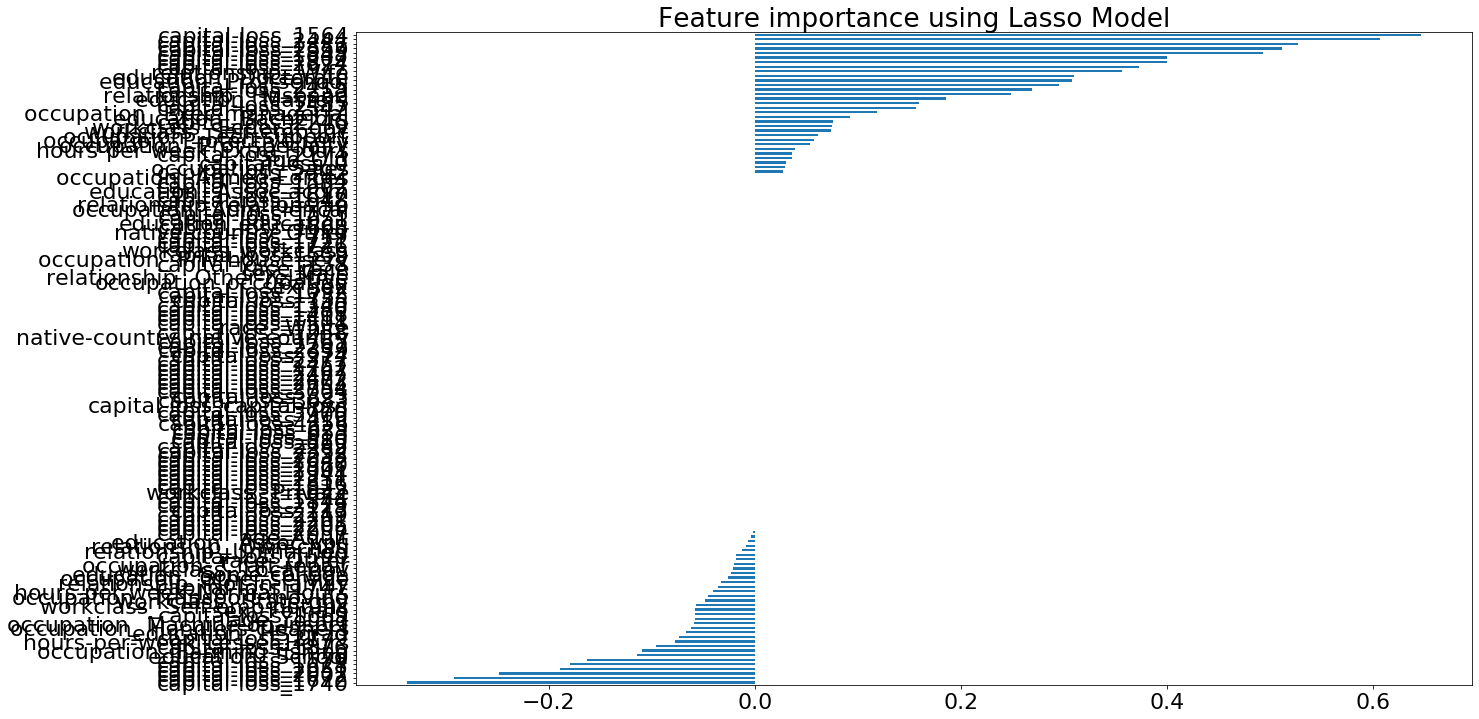

In [74]:
plt.rcParams.update({'font.size': 22})
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (20.0, 12.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In momentul sustinerii partialului nu am fost suficient de documentat cu referite la pregatirea datelor, la manipularea acestora si la modurile de filtrare.

In perspectiva conceperii acestui proiect a trebuit sa ma documentez mult mai amanuntit decat am facut-o inaintea sustinerii partialului si din aceasta cauza ceea ce am facut in proiect si planul scris pe hartie nu au putut fi identice intr-o proportie mai mare.
